In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring data

In [4]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## split our data

In [5]:
from sklearn.model_selection import train_test_split

features = ["Pclass","Sex","SibSp","Parch"]
X = train_data[features].values
X_test = test_data[features].values
X[:5]

array([[3, 'male', 1, 0],
       [1, 'female', 1, 0],
       [3, 'female', 0, 0],
       [1, 'female', 1, 0],
       [3, 'male', 0, 0]], dtype=object)

In [6]:
y = train_data['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## transform Sex to be in numeric value

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male','female'])
X[:,1] = le_sex.transform(X[:,1])
X_test[:,1] = le_sex.transform(X_test[:,1]) 

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 4)

# Using K nearest Neighbors for prediction

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = 10
mean_acc = np.zeros((ks-1))
for i in range(1,ks) :
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train , y_train) 
    predict = neigh.predict(x_test)
    mean_acc[i-1] =  accuracy_score(y_test , predict)

mean_acc

array([0.79850746, 0.81716418, 0.81716418, 0.82835821, 0.81716418,
       0.81716418, 0.80597015, 0.78358209, 0.78731343])

In [10]:
print("The best accuracy was with ",mean_acc.max() , " with k = " , mean_acc.argmax()+1)

The best accuracy was with  0.8283582089552238  with k =  4


# Using Decision tree for prediction

In [11]:
from sklearn.tree import DecisionTreeClassifier

titanicTree =  DecisionTreeClassifier(criterion = "entropy" , max_depth = 4)
titanicTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
titanicTree.fit(x_train , y_train)
predTree = titanicTree.predict(x_test)

## Compare the prediction with the actual value 

In [13]:
print(predTree[:5])
print(y_test[:5])

[0 0 1 1 0]
646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64


# Evaluation

In [14]:
print("Decision tree accuracy : " , accuracy_score(y_test , predTree))

Decision tree accuracy :  0.8208955223880597


## Visualization

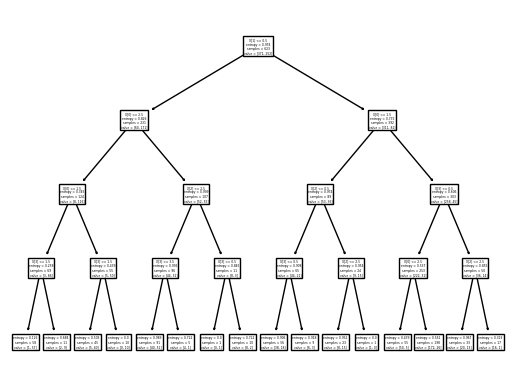

In [15]:
import sklearn.tree as tree
import matplotlib.pyplot as plt

tree.plot_tree(titanicTree)
plt.show()

# Using Logistic regression for Prediction

In [16]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.1 , solver = 'lbfgs').fit(x_train , y_train)
LR

LogisticRegression(C=0.1)

In [17]:
predLR = LR.predict(x_test)

## Compare the prediction with the actual value 

In [18]:
print(predLR[:5])
print(y_test[:5])

[0 0 1 1 0]
646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64


# Evaluation

In [19]:
print("Logistic regression Accuracy : " , accuracy_score(y_test , predLR))

Logistic regression Accuracy :  0.8432835820895522


# Using SVM for prediction

In [20]:
from sklearn.svm import SVC

titanicSVM = SVC(kernel="rbf").fit(x_train , y_train)
titanicSVM

SVC()

In [21]:
predSVM = titanicSVM.predict(x_test)

In [22]:
print("SVM accuracy :" , accuracy_score(y_test , predSVM))

SVM accuracy : 0.835820895522388


# Conclusion

### the model that has the highest accuracy is Logistic regression with 0.8432835820895522

In [23]:
predictions = LR.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
